# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [83]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [84]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [89]:
tab_sex = pd.crosstab(df['sex'], df['flag_doente'], margins= True)
tab_sex['percent_doentes'] = tab_sex[1]/tab_sex['All']
tab_sex['chance_odds'] = tab_sex[1]/tab_sex[0]
tab_sex['odds_ratio_total'] = tab_sex['chance_odds']/tab_sex.loc['All','chance_odds']
tab_sex['logito'] = np.log(tab_sex['chance_odds'])
tab_sex['weight_of_evidence'] = np.log(tab_sex['odds_ratio_total'])
tab_sex

flag_doente,0,1,All,percent_doentes,chance_odds,odds_ratio_total,logito,weight_of_evidence
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [87]:
intervalo_idade = (df['age'].max() - df['age'].min()) / 5

minimo = df['age'].min()
minimo_1 = minimo + intervalo_idade
minimo_2 = minimo + (intervalo_idade * 2)
minimo_3 = minimo + (intervalo_idade * 3)
minimo_4 = minimo + (intervalo_idade * 4)
maximo = df['age'].max()

bins = [-100, minimo_1, minimo_2, minimo_3, minimo_4, maximo]
print(bins)
labels = [
    f"{minimo} a {minimo_1} anos",
    f"{minimo_1} a {minimo_2} anos",
    f"{minimo_2} a {minimo_3} anos",
    f"{minimo_3} a {minimo_4} anos",
    f"{minimo_4} a {maximo} anos"
]
print(labels)
df['cat_age'] = pd.cut(df['age'], bins=bins, labels=labels)
df

[-100, 38.6, 48.2, 57.8, 67.4, 77.0]
['29.0 a 38.6 anos', '38.6 a 48.2 anos', '48.2 a 57.8 anos', '57.8 a 67.4 anos', '67.4 a 77.0 anos']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,cat_age
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,57.8 a 67.4 anos
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,57.8 a 67.4 anos
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,57.8 a 67.4 anos
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,29.0 a 38.6 anos
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,38.6 a 48.2 anos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,38.6 a 48.2 anos
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,67.4 a 77.0 anos
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,48.2 a 57.8 anos
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,48.2 a 57.8 anos


In [98]:
tab_age = pd.crosstab(df['cat_age'], df['flag_doente'], margins= True)
tab_age['percent_doentes'] = tab_age[1]/tab_age['All']
tab_age['chance_odds'] = tab_age[1]/tab_age[0]
tab_age['odds_ratio_total'] = tab_age['chance_odds']/tab_age.loc['All','chance_odds']
tab_age['logito'] = np.log(tab_age['chance_odds'])
tab_age['weight_of_evidence'] = np.log(tab_age['odds_ratio_total'])
tab_age['age_mean'] = df.groupby('cat_age')['age'].mean()
tab_age

flag_doente,0,1,All,percent_doentes,chance_odds,odds_ratio_total,logito,weight_of_evidence,age_mean
cat_age,,,,,,,,,
29.0 a 38.6 anos,8,3,11,0.272727,0.375000,0.442446,-0.980829,-0.815437,35.181818
38.6 a 48.2 anos,50,21,71,0.295775,0.420000,0.495540,-0.867501,-0.702108,43.704225
48.2 a 57.8 anos,56,41,97,0.422680,0.732143,0.863823,-0.311780,-0.146387,53.567010
57.8 a 67.4 anos,40,67,107,0.626168,1.675000,1.976259,0.515813,0.681206,61.775701
67.4 a 77.0 anos,10,7,17,0.411765,0.700000,0.825899,-0.356675,-0.191282,70.529412
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000,NaN


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

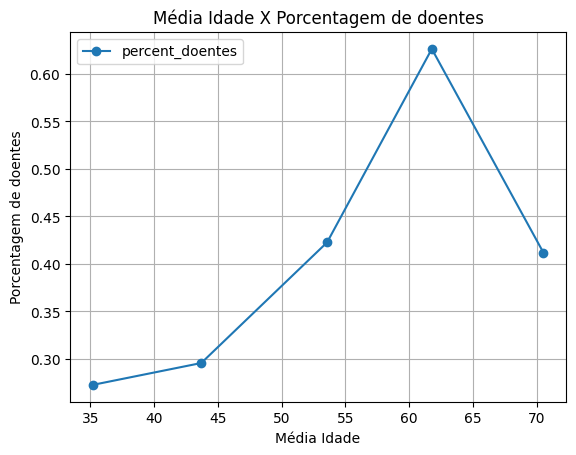

In [111]:
tab_age.plot(x='age_mean', y='percent_doentes', kind='line', marker='o')

# Mostrando o gráfico
plt.xlabel('Média Idade')
plt.ylabel('Porcentagem de doentes')
plt.title('Média Idade X Porcentagem de doentes')
plt.grid(True)
plt.show()

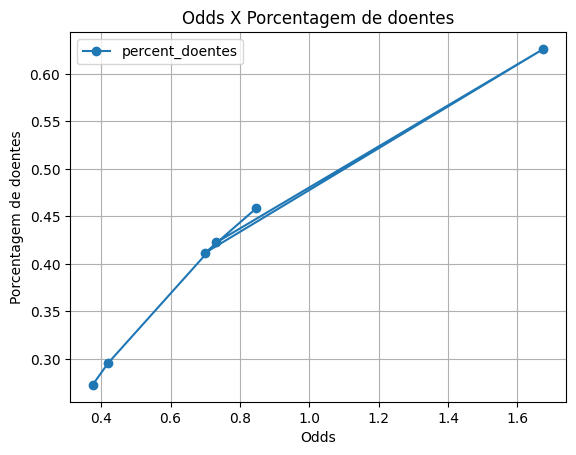

In [112]:
tab_age.plot(x='chance_odds', y='percent_doentes', kind='line', marker='o')

# Mostrando o gráfico
plt.xlabel('Odds')
plt.ylabel('Porcentagem de doentes')
plt.title('Odds X Porcentagem de doentes')
plt.grid(True)
plt.show()